# Welcome to the exciting world of Computer Vision and Image Processing! 

**In this workshop, We'll cover the basics of image processing, exploring techniques to enhance, filter, and transform images to extract valuable information. Through hands-on examples and practical exercises, you'll gain a strong foundation in computer vision and image processing**

**How to create an image**

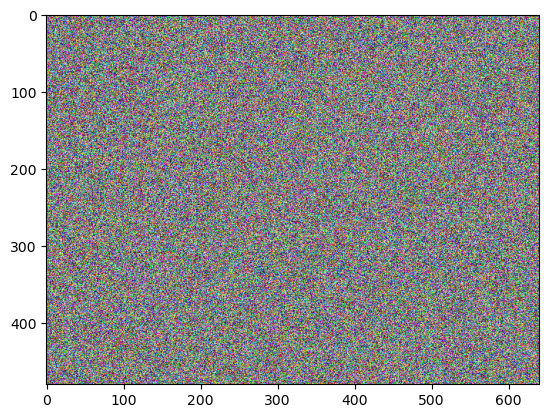

In [1]:
import numpy as np
import matplotlib.pyplot as plt
im_shape = 480, 640, 3
im = np.random.rand(*im_shape)
plt.imshow(im)
plt.show()

**How to import an image**



- import by Pillow

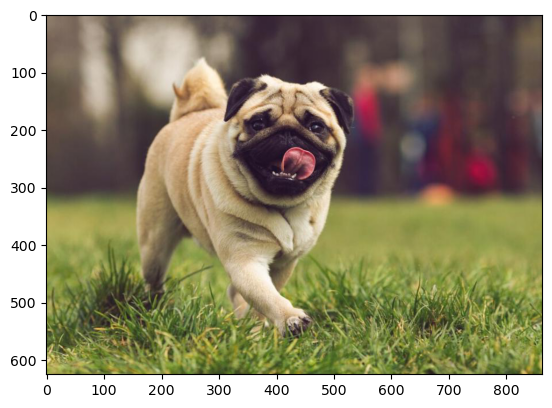

In [2]:
from PIL import Image
pug_image = Image.open('pug_dog.jpg')
pug_image = np.array(pug_image)
plt.imshow(pug_image)
plt.show()

- import by opencv

 Remind that when reading a color image file, OpenCV imread() reads as a NumPy array ndarray of row (height) x column (width) x color (3). The order of color is BGR (blue, green, red).

In [4]:
!pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 6.7 MB/s eta 0:00:00


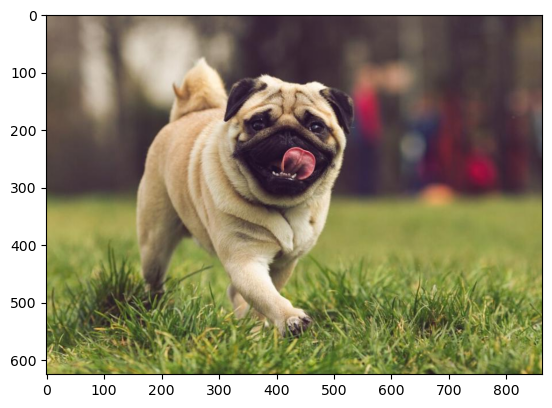

In [2]:
import cv2
pug_image = cv2.imread('pug_dog.jpg')
pug_image = cv2.cvtColor(pug_image, cv2.COLOR_RGB2BGR)
plt.imshow(pug_image)
plt.show()

In [13]:
pug_image.shape

(625, 863, 3)

**RGB Channels**

An RGB image has three channels: red, green, and blue. RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.

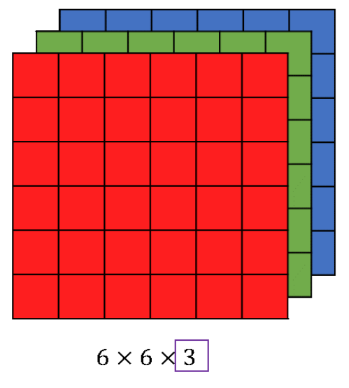

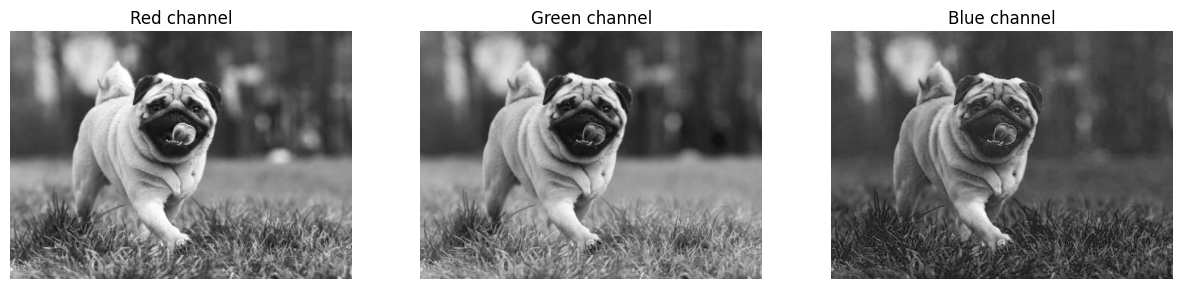

In [22]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(pug_image[:,:,0], cmap='gray')
axs[1].imshow(pug_image[:,:,1], cmap='gray')
axs[2].imshow(pug_image[:,:,2], cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

**How to export an image**

Choose image file extension
- Lossless: png, gif, tiff, bmp
- Lossy: jpg
- Multiple images: gif, tiff
- Light weight: gif
- High quality: tiff

Ex.

```
cv2.imwrite('pug_image.png', np.uint8(pug_image*255))
```


```
im = Image.fromarray(np.uint8(pug_image*255))
im.save('pug_image.jpg')
```




**Basic image operation**
- Resize
- Bluring
- Sharpening

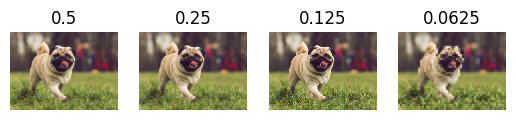

In [20]:
n = 4
for i in range(1, n+1):
  plt.subplot(1, n, i)
  s = 1/2**(i)
  plt.imshow(cv2.resize(pug_image, None, fx=s, fy=s))
  plt.axis('off')
  plt.title(str(s))
plt.show()

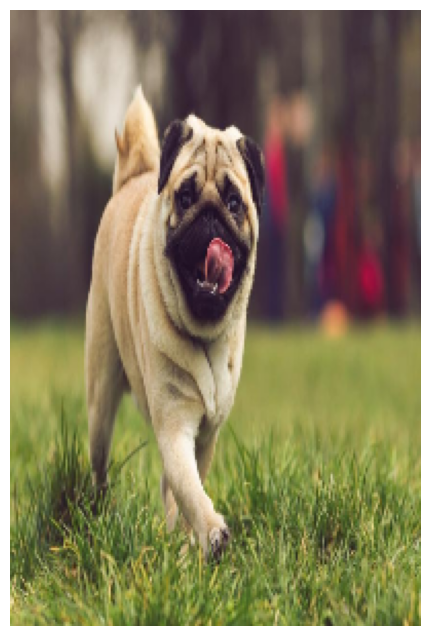

In [46]:
img_resize = cv2.resize(pug_image, (200, 300))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

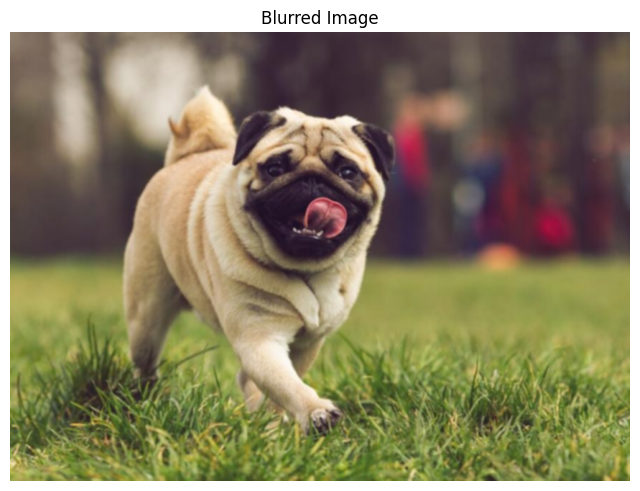

In [50]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(pug_image, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

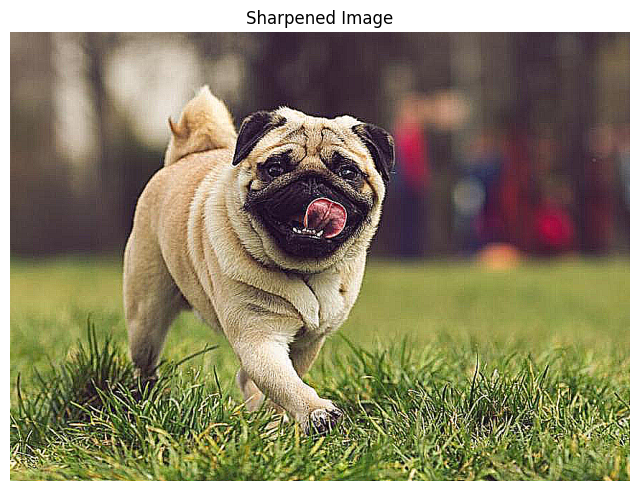

In [52]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(pug_image, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

**Challenge 1**
- Reading 'pug.png'  
- create a sketch image by following methods:
    - crop image at (x=[100,600], y=[50,550])
    - convert image to grayscale
    - smoothing inverted_gray by Gaussain blur filter_size=(21,21)
    - divide gray_image with blurred image
    
- Saving processed image as 'sketch_pug.png'

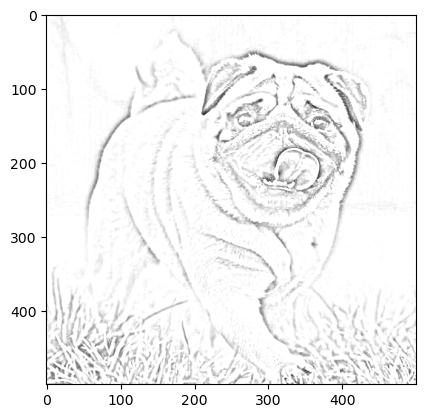

In [145]:
# solution
cropped_pug = pug_image[50:550, 100:600]
gray = cv2.cvtColor(cropped_pug,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray,(21,21),0)
sketch = cv2.divide(gray,blurred,scale = 256.0)

# save the image
cv2.imwrite('sketch_pug.png', sketch)

plt.imshow(sketch, cmap='gray')

**How to import a video**

Read frame-by-frame

In [12]:
import cv2
cap = cv2.VideoCapture('cars_motorway.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q') or not ret:
        break
cap.release()
cv2.destroyAllWindows()

How to create a video

In [13]:
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# frame_size = (480, 640, 3)
# vdo_writer = cv2.VideoWriter('out.mp4', fourcc, 30, (frame_size[1], frame_size[0]))
# for i in range(640):
#     frame = np.zeros(frame_size, np.uint8)
#     cv2.circle(frame, (i, 200), 20, (255,255,255), -1)
#     vdo_writer.write(frame)
# vdo_writer.release()

**Basic Computer vision techniques**

Color Detection

(-0.5, 1022.5, 730.5, -0.5)

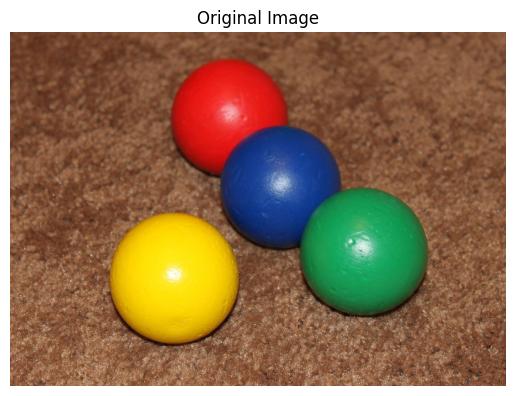

In [53]:
ball = cv2.imread('color_balls.jpg')
plt.imshow(cv2.cvtColor(ball, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

(-0.5, 1022.5, 730.5, -0.5)

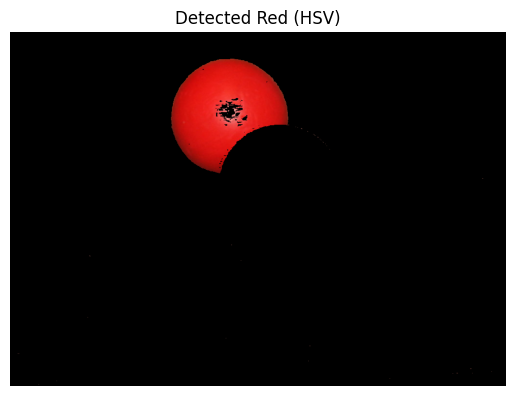

In [54]:
hsv_image = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)   # Convert the image to the HSV color space
lower_red = np.array([0, 100, 100])
upper_red = np.array([5, 255, 255])
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)   # Create a mask for red color in HSV
result_hsv = cv2.bitwise_and(ball, ball, mask=red_mask)  # Bitwise-AND the original image and the mask
result_rgb_hsv = cv2.cvtColor(result_hsv, cv2.COLOR_BGR2RGB)  # Convert the image to the RGB color space

plt.imshow(result_rgb_hsv)
plt.title('Detected Red (HSV)')
plt.axis('off')

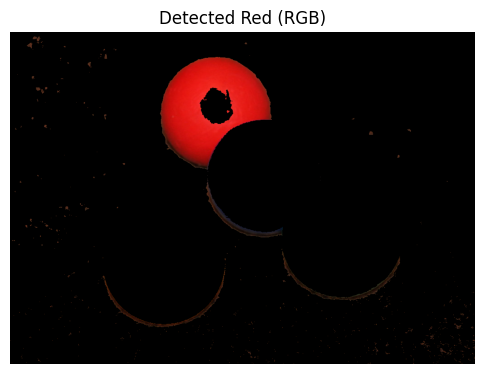

In [55]:
lower_red = np.array([0, 0, 0])
upper_red = np.array([50, 50, 255])

red_mask_rgb = cv2.inRange(ball, lower_red, upper_red)  # Create a mask for red color in RGB
result_rgb = cv2.bitwise_and(ball, ball, mask=red_mask_rgb)   # Bitwise-AND the original image and the mask
result_rgb = cv2.cvtColor(result_rgb, cv2.COLOR_BGR2RGB)  # Convert the image to the RGB color space

plt.figure(figsize=(6, 6))
plt.imshow(result_rgb)
plt.title('Detected Red (RGB)')
plt.axis('off')
plt.show()

**Basic image segmentation**
- Thresholding
- OTSU thresholding
- Local adaptiive thresholding

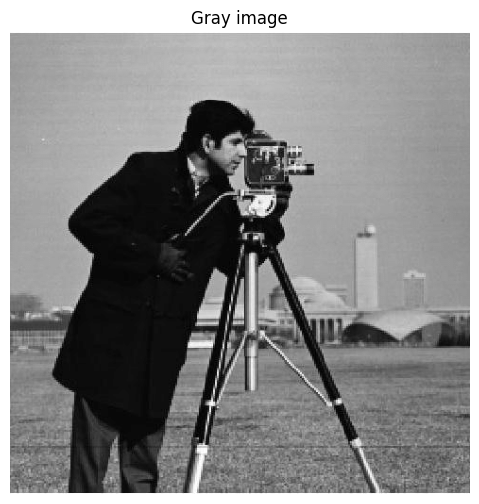

In [74]:
image = cv2.imread('camera_man.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title('Gray image')
plt.axis('off')
plt.show()

(-0.5, 486.5, 489.5, -0.5)

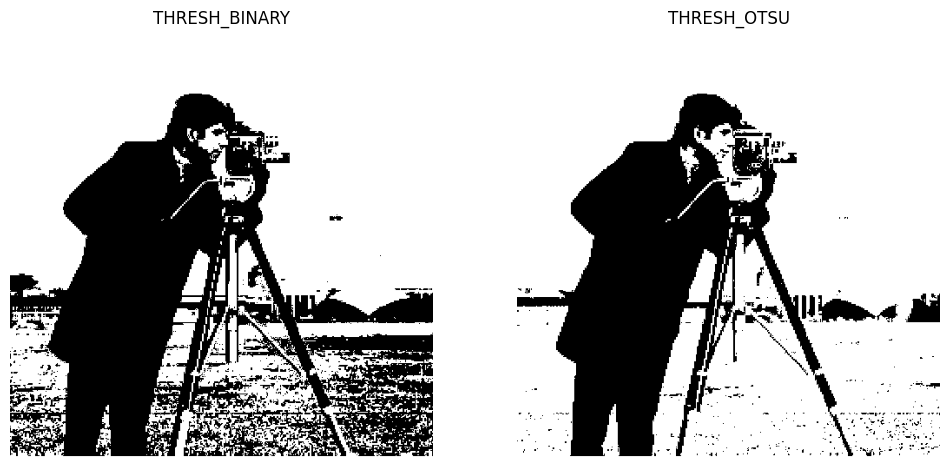

In [77]:
bw1 = cv2.threshold(img_gray,125,255,cv2.THRESH_BINARY)[1]
bw2 = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(bw1, cmap='gray')
plt.title('THRESH_BINARY')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bw2, cmap='gray')
plt.title('THRESH_OTSU')
plt.axis('off')

**Morphological Transformations**

(-0.5, 399.5, 225.5, -0.5)

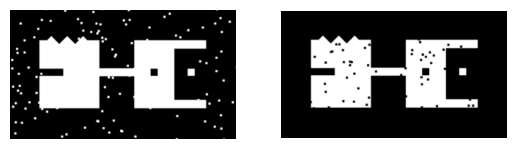

In [13]:
im1 = plt.imread('morph_ex1.png', cv2.IMREAD_GRAYSCALE)
im2 = plt.imread('morph_ex2.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im2, cmap='gray')
plt.axis('off')

- Opening = erosion followed by dilation (removing noise)
- Closing = dilation followed by erosion (closing small holes)

(-0.5, 399.5, 225.5, -0.5)

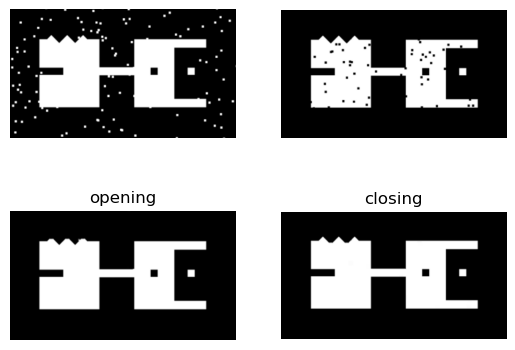

In [18]:
kernel = np.ones((7, 7))
opening = cv2.erode(im1, kernel)
opening = cv2.dilate(opening, kernel)

closing = cv2.dilate(im2, kernel)
closing = cv2.erode(closing, kernel)

plt.subplot(2,2,1)
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.title('opening')
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.title('closing')
plt.imshow(closing, cmap='gray')
plt.axis('off')

**Challege 2 : Basic image segmentation**
- Segment foreground object (Miku-chan) as shown in below example 
- Hint1: Foreground_object = |Fg - Bg|
- Hint2: combine all methods that you learn such as thresholding and morphological operations to obtain complete segmentation mask

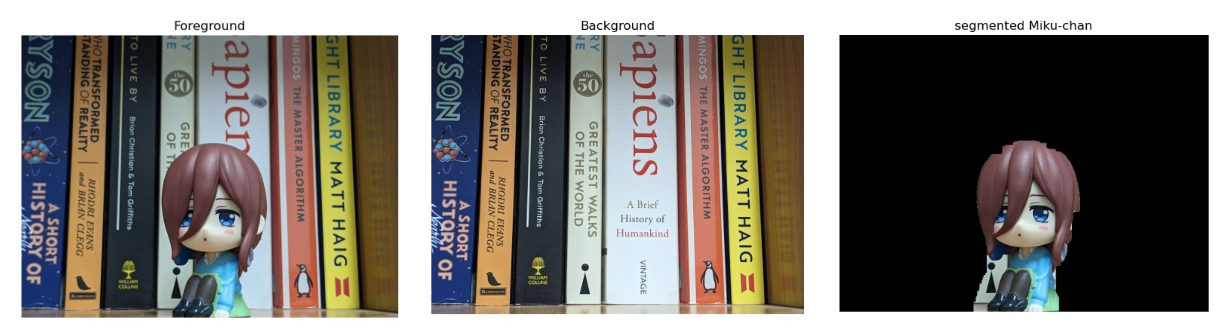

(-0.5, 806.5, 604.5, -0.5)

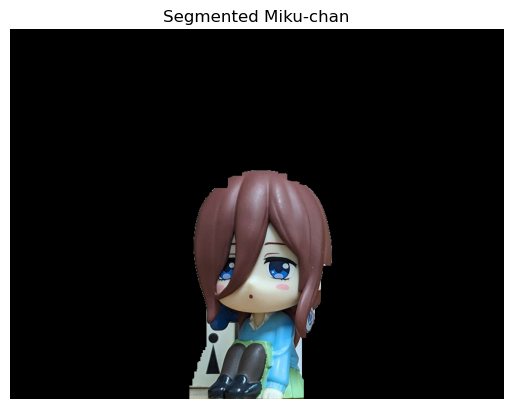

In [135]:
# solution
im1 = plt.imread('Fg.jpg')
im2 = plt.imread('Bg.jpg') 

diff = cv2.absdiff(im1, im2)
diff = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
bw = cv2.threshold(diff,30,255,cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5),np.uint8)
bw = cv2.erode(bw,kernel,iterations=2)
bw = cv2.dilate(bw,kernel,iterations=2)

kernel = np.ones((17,17),np.uint8)
bw = cv2.dilate(bw,kernel,iterations=4)
bw = cv2.erode(bw,kernel,iterations=4)

result_segment = cv2.bitwise_and(im1, im1, mask=bw)

plt.imshow(result_segment)
plt.title('Segmented Miku-chan')
plt.axis('off')

In [136]:
# def angle_diff(a1, a2):
#     return (abs(a1[:, :, 0] - a2[:, :, 0]))

# im1 = plt.imread('Fg.jpg')
# im2 = plt.imread('Bg.jpg') 
# im1_hsv = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV) 
# im2_hsv = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV) 

# diff = angle_diff(im1_hsv, im2_hsv)
# diff = np.uint8(255*diff)
# # diff = cv2.absdiff(im1, im2)
# # diff = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
# bw = cv2.threshold(diff,30,255,cv2.THRESH_BINARY)[1]
# # bw = cv2.threshold(diff,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]

# # kernel = np.ones((5,5),np.uint8)
# # bw = cv2.erode(bw,kernel,iterations=2)
# # bw = cv2.dilate(bw,kernel,iterations=2)

# # kernel = np.ones((17,17),np.uint8)
# # bw = cv2.dilate(bw,kernel,iterations=3)
# # bw = cv2.erode(bw,kernel,iterations=3)

# # result_segment = cv2.bitwise_and(im1, im1, mask=bw)

# plt.imshow(diff, cmap='gray')
# plt.title('segmented Miku-chan')
# plt.axis('off')

**Background Subtraction**
- Have bachground : Frame Difference
- Don't have bachground
  - |f(t) - f(t-1)| > th
  - Mean : |f(t) - mean(f(t-n)...f(t-1))| > th
  - Median : |f(t) - median(f(t-n)...f(t-1))| > th
  - Recursive method (MOG/KNN)

In [5]:
cap = cv2.VideoCapture('cars_motorway.mp4')
buffer = None
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if buffer is not None:
        diff = np.mean(cv2.absdiff(frame, buffer), axis=2)
        fg = np.uint8((diff > 0.5*np.max(diff)) * 255)
        cv2.imshow('diff', np.uint8(diff / np.max(diff) * 255))
        cv2.imshow('fg', fg)
    buffer = frame
    cv2.imshow('frame', frame) 
    if cv2.waitKey(1) == ord('q'):
        break 
        
cap.release()
cv2.destroyAllWindows()

**Background Subtraction : Mean frame**

In [ ]:
cap = cv2.VideoCapture('cars_motorway.mp4')

n_buffer = 10
buffer = None
iframe = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if buffer is None:
        buffer = np.zeros((n_buffer, *gray.shape))
    buffer[iframe % n_buffer] = gray
    if iframe >= n_buffer:
        M = np.median(buffer, axis=0)
        diff = cv2.absdiff(gray, np.uint8(M))
        fg = np.uint8((diff > .4 * np.max(diff)) * 255)
        cv2.imshow('fg', fg)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break 
    iframe += 1

cap.release()
cv2.destroyAllWindows()

Median

In [8]:
cap = cv2.VideoCapture('cars_motorway.mp4')

n_buffer = 10
buffer = None
iframe = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if buffer is None:
        buffer = np.zeros((n_buffer, *gray.shape))
    buffer[iframe % n_buffer] = gray
    if iframe >= n_buffer:
        M = np.median(buffer, axis=0)
        diff = cv2.absdiff(gray, np.uint8(M))
        fg = np.uint8((diff > .4 * np.max(diff)) * 255)
        cv2.imshow('fg', fg)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break 
    iframe += 1

cap.release()
cv2.destroyAllWindows()

BG subtraction: Recursive methods

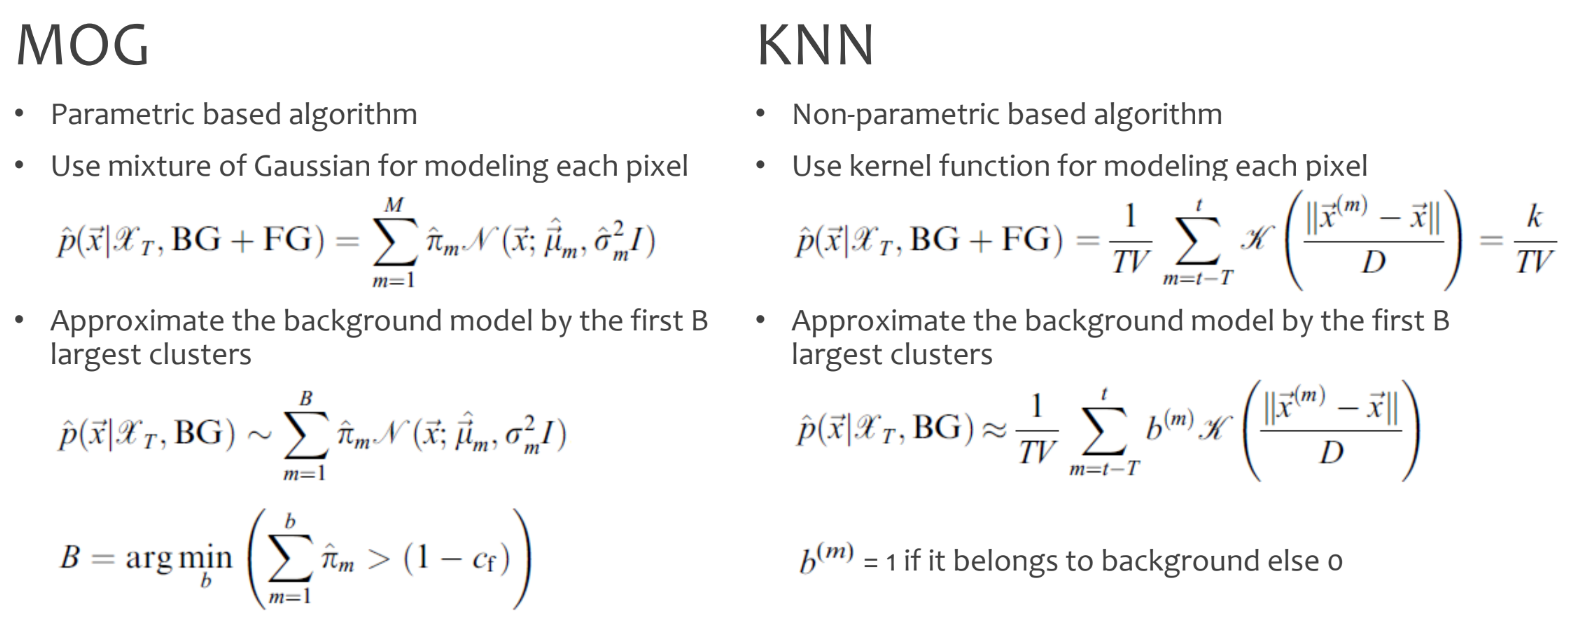

In [9]:
cap = cv2.VideoCapture('cars_motorway.mp4')
bgsubmog = cv2.createBackgroundSubtractorMOG2()
while True:
    ret, frame = cap.read()
    if not ret:
        break
    fgmog = bgsubmog.apply(frame)
    cv2.imshow('frame', frame)
    cv2.imshow('fgmog', fgmog)
    if cv2.waitKey(1) == ord('q'):
        break 

cap.release()
cv2.destroyAllWindows()

**Challenge 3 : Detecting moving cars in this video and create box at the detected car**

- Detecting cars in 'cars_motorway.mp4' video and create bbox around detected object.
- Note: Overlapped cars is OK.

In [179]:
# solution
cap = cv2.VideoCapture('cars_motorway.mp4')

# create a background object
backgroundObject = cv2.createBackgroundSubtractorMOG2(history=2)
kernel = np.ones((3,3),np.uint8)
kernel2 = None

while True:
    ret , frame = cap.read()
    if not ret :
        break
    
    fgmask = backgroundObject.apply(frame)
    _, fgmask = cv2.threshold(fgmask ,20 , 255 , cv2.THRESH_BINARY)
    fgmask = cv2.erode(fgmask, kernel, iterations=1)
    fgmask = cv2.dilate(fgmask,kernel2 , iterations=6  )


    # detect the countours
    countors, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    frameCopy = frame.copy()

    # loop inside the countor and search for bigger ones

    for cnt in countors:
        if cv2.contourArea(cnt) > 20000:

            # get the area coordinates
            x , y, width , height = cv2.boundingRect(cnt)

            # draw a rectangle around the area
            cv2.rectangle(frameCopy, (x,y), (x+width, y+ height) , (0,0,255), 2)

            # write a text near the object 
            cv2.putText(frameCopy ,"Car detected", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3 , (0,255,0), 1, cv2.LINE_AA)

    forground = cv2.bitwise_and(frame,frame , mask = fgmask)

    # combine all together 
    stacked = np.hstack((frame,forground,frameCopy))

    cv2.imshow("stacked", cv2.resize(stacked,None,fx=0.4, fy=0.4))

    #cv2.imshow("forground", forground)
    #cv2.imshow("frameCopy", frameCopy)
    #cv2.imshow("fgmask", fgmask)
    #cv2.imshow("img", frame)

    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

<!-- Perspective Transform

- Object is smaller as its distance from camera increases
- Find 4 points to estimate the transformation (same sequence) -->

**Blob analysis**

- cv2.findContours() for binary image
    - Connected points are grouped together as object
    - Find object with suitable properties, e.g. find the smallest circle that can cover this object

Contour Features
https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html

**Challenge 4 : Coins counting**

Counting total coins and total  amount (Baht) of 'Thai_coins.png' image

Hint: For this image, radius of 1-Baht, 5-Baht, and 10-Baht coins are 79-83, 96-100, and 103-107 pixels, respectively. 

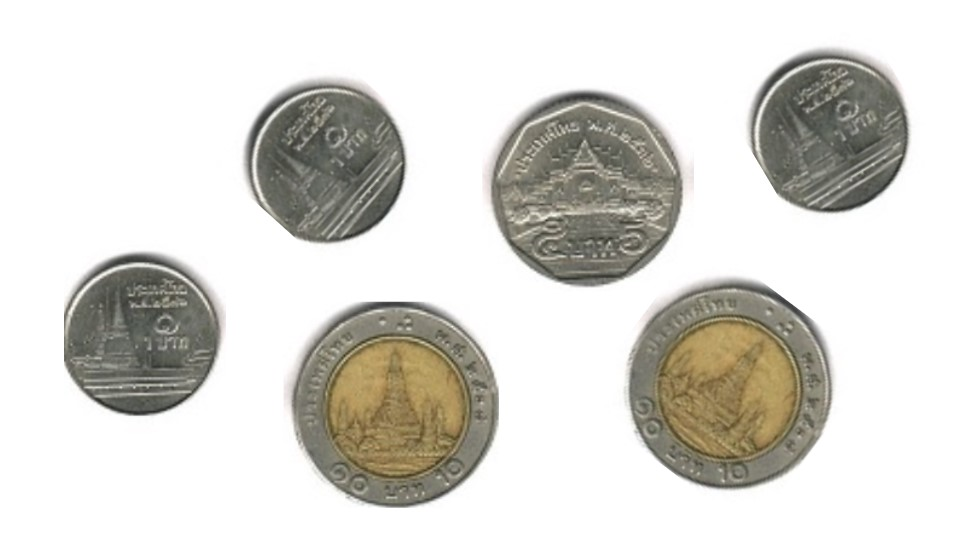

Text(0.5, 1.0, 'Total coins = 5, Total amount = 28')

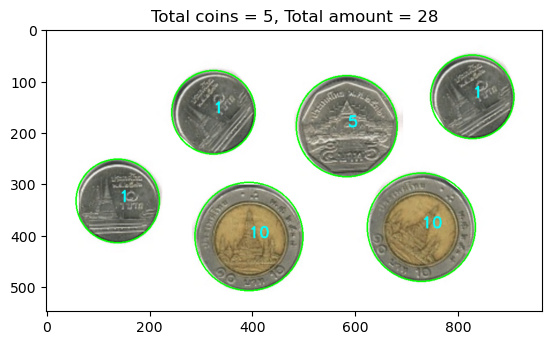

In [177]:
# solution
img = cv2.imread("Thai_coins.png")
img = gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
bw = cv2.threshold(blur,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
bw = 255 - bw

# lets find each coin by its contour
contours , hierarchy = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sortedCon = sorted(contours, key=cv2.contourArea)

amount = 0
for i , cnt in enumerate(sortedCon):
    x, y, w, h = cv2.boundingRect(cnt)
    
    # find the center of each circle
    X = x + int(w/2)
    Y = y + int(h/2)
    
    # circle
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
#     print(radius)
    if 79 < radius < 83:
        amount += 1
        cv2.circle(img,center,radius,(0,255,0),2)
        img = cv2.putText(img = img , text=str(1), org=(X,Y), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.0 , color=(0,255,255), thickness=2)

    if 96 < radius < 100:
        amount += 5
        cv2.circle(img,center,radius,(0,255,0),2)
        img = cv2.putText(img = img , text=str(5), org=(X,Y), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.0 , color=(0,255,255), thickness=2)

    if 103 < radius < 107:
        amount += 10
        cv2.circle(img,center,radius,(0,255,0),2)
        img = cv2.putText(img = img , text=str(10), org=(X,Y), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.0 , color=(0,255,255), thickness=2)


plt.imshow(img)
plt.title('Total coins = ' + str(i) + ', Total amount = ' + str(amount))

# Template Matching

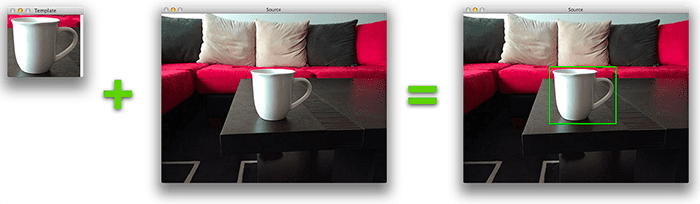
Ref: https://pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/

Template matching can be seen as a very basic form of object detection. Using template matching, we can detect objects in an input image using a “template” containing the object we want to detect.

Essentially, what this means is that we require two images to apply template matching:

Source image: This is the image we expect to find a match to our template in.
Template image: The “object patch” we are searching for in the source image.
To find the template in the source image, we slide the template from left-to-right and top-to-bottom across the source:

**Template matching by TM_CCOEFF, TM_CCORR, or TM_SQDIFF**

Tutorial : https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

(484, 262)


(-0.5, 1023.5, 767.5, -0.5)

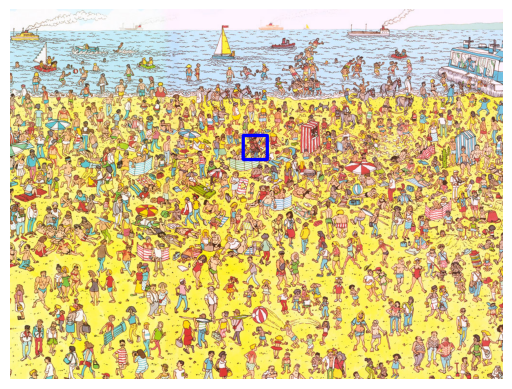

In [5]:
#solution
image = cv2.imread("WaldoBeach.jpg")
waldo = cv2.imread("waldo.jpg",0) # load it as gray scale

# convert the image to gray scale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# find one image inside another image
result = cv2.matchTemplate(gray, waldo , cv2.TM_CCOEFF)
min_val , max_val , min_loc , max_loc = cv2.minMaxLoc(result)

# this is the left position of Waldo

print (max_loc)

top_left = max_loc
bottom_right = (top_left[0] + 50 , top_left[1] + 50)

# lets show the position 
cv2.rectangle(image, top_left, bottom_right, (255,0,0), 5)

# cv2.imwrite("WaldoBeach2.jpg",image)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

**Feature Matching by SIFT**

Feature detection  by Scale-invariant feature transform (SIFT)
- Output
- Keypoint: location, angle, size, etc.
- Descriptor: 128-D vector of each keypoint
- Use for similarity measurement

Feature matching
- Brute-Force
- FLANN (Fast Library for Approximate Nearest Neighbors)
- Randomized kd-tree k-nn

** Challenge 5 : create ID card detection program by SIFT template matching
To do 
- Use 'thai_id_card_template.jpg' as a template image
- Card will be detected if number of good key points > 10 otherwise, not detected (display result in display window)

Hint:
 - Experiment with various matching methods and find the suitable method for this task.

In [205]:
# solution

MATCHING_TH = 8
img1 = cv2.imread("thai_id_card_template.jpg", cv2.IMREAD_GRAYSCALE)
ft = cv2.SIFT_create()
kp1, des1 = ft.detectAndCompute(img1, None)
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

bf = cv2.BFMatcher()

while True:
    ret, img2 = cap.read()
    kp2, des2 = ft.detectAndCompute(img2, None)
    matches = bf.knnMatch(des1, des2, k=2)
#     matches = flann.knnMatch(des1.astype(np.float32), des2.astype(np.float32), k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.5*n.distance:
            good.append(m)
    matching_result = cv2.drawMatches(img1, kp1, img2, kp2, good[:50], None, flags=2)
    if len(good) > MATCHING_TH:
        cv2.putText(matching_result, 'kp=' + str(len(good)) + ' --> card detected', (500, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    else:
        cv2.putText(matching_result, 'kp=' + str(len(good)) + ' --> card not detected', (500, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    cv2.imshow('Matching result', matching_result)
        
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [200]:
cap.release()
cv2.destroyAllWindows()

# Basic Optical Character Recognition (OCR)

Optical character recognition or optical character reader (OCR) is the electronic or mechanical conversion of images of typed, handwritten or printed text into machine-encoded text, whether from a scanned document, a photo of a document, a scene photo (for example the text on signs and billboards in a landscape photo) or from subtitle text superimposed on an image.

In [7]:
!pip install easyocr

     ---------------------------------------- 2.9/2.9 MB 772.4 kB/s eta 0:00:00
  Using cached torchvision-0.16.0-cp310-cp310-win_amd64.whl (1.3 MB)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[160, 301], [1344, 301], [1344, 613], [160, 613]], 'FREE BEER', 0.9660418252260964), ([[510, 580], [999, 580], [999, 671], [510, 671]], 'TOMORROW', 0.6277683082404403)]
([[160, 301], [1344, 301], [1344, 613], [160, 613]], 'FREE BEER', 0.9660418252260964)
([[510, 580], [999, 580], [999, 671], [510, 671]], 'TOMORROW', 0.6277683082404403)


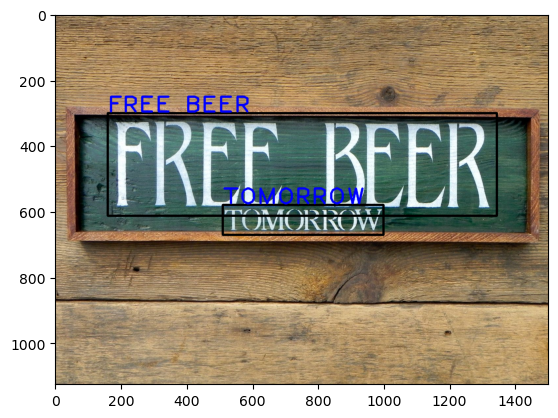

In [9]:
import easyocr 

path = "text_image.jpg"
img = cv2.imread(path)

# create detector
reader = easyocr.Reader(['en'])

# detect text on the image
myText = reader.readtext(img)
print(myText)

minThresholdForDisplay = 0.25

for numerator , detectedText in enumerate(myText):
    print(detectedText)

    bbox , text , score = detectedText
    pos1 = bbox[0]
    pos2 = bbox[2]

    if score > minThresholdForDisplay :
        cv2.rectangle(img,pos1,pos2, (0,0,0), 5)
        cv2.putText(img,text,pos1,cv2.FONT_HERSHEY_PLAIN, 5, (255,0,0), 5)


# cv2.imwrite("c:/temp/opticalRecog.png",img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()